In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [9]:
df = pd.read_csv("/content/Career Mode player fifa21.csv", encoding='latin1')

print(df.head())
print(df.columns)

   sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     200389  https://sofifa.com/player/200389/jan-oblak/210002   
3     188545  https://sofifa.com/player/188545/robert-lewand...   
4     190871  https://sofifa.com/player/190871/neymar-da-sil...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   33  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   35  1985-02-05   
2           J. Oblak                            Jan Oblak   27  1993-01-07   
3     R. Lewandowski                   Robert Lewandowski   31  1988-08-21   
4          Neymar Jr        Neymar da Silva Santos Júnior   28  1992-02-05   

   height_cm  weight_kg nationality            club_name  ...   lwb   ldm  \
0        170         72   Argentina         FC Barc

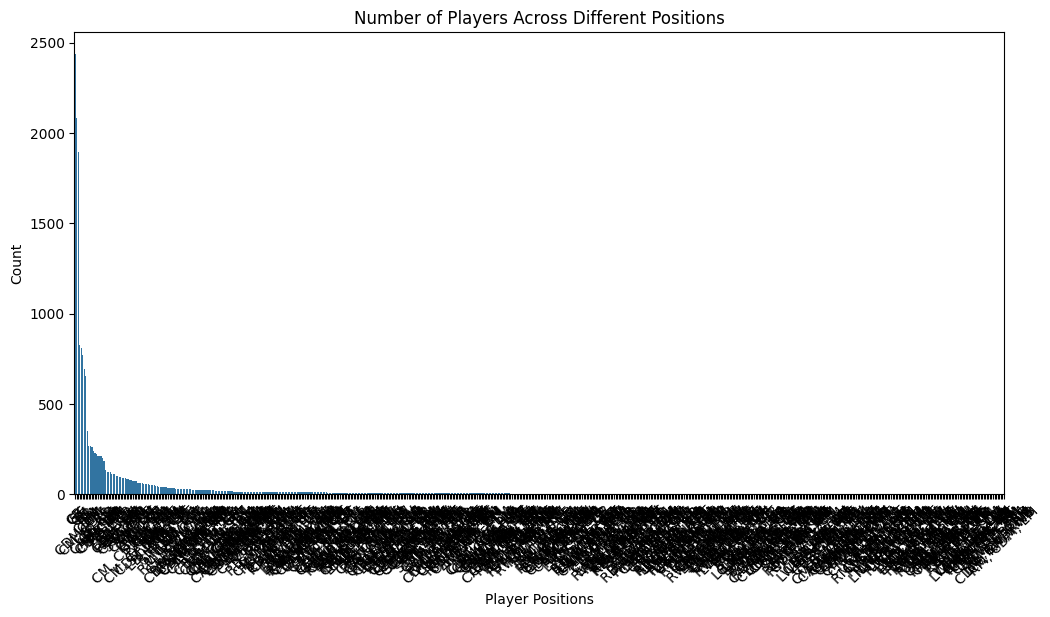

In [11]:
# 1. BAR CHART
plt.figure(figsize=(12,6))
sns.countplot(
    data=df,
    x='player_positions',
    order=df['player_positions'].value_counts().index
)
plt.xticks(rotation=45)
plt.title("Number of Players Across Different Positions")
plt.xlabel("Player Positions")
plt.ylabel("Count")
plt.show()

/tmp/ipython-input-1856186810.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_counts = df.groupby(['Rating_Group', 'player_positions']).size().unstack(fill_value=0)


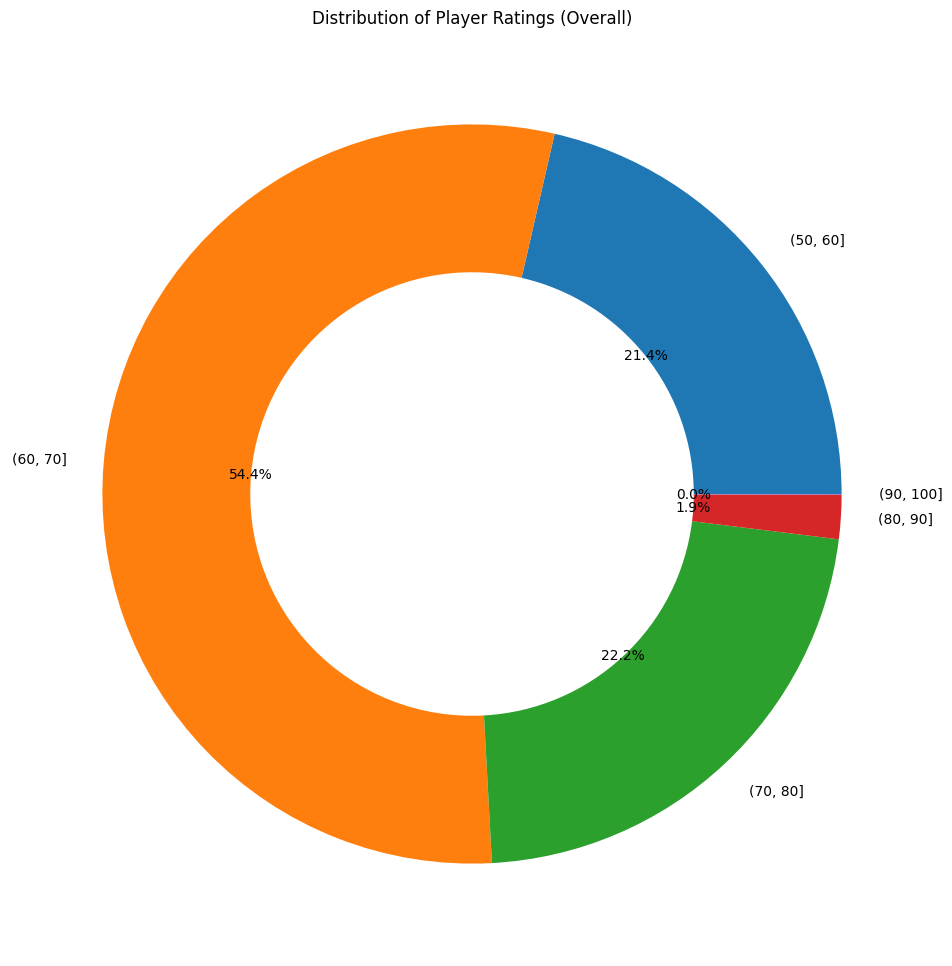

In [12]:
# 2. DONUT CHARt
rating_bins = [50, 60, 70, 80, 90, 100]
df['Rating_Group'] = pd.cut(df['overall'], bins=rating_bins)

rating_counts = df.groupby(['Rating_Group', 'player_positions']).size().unstack(fill_value=0)

plt.figure(figsize=(12,12))
rating_counts.sum(axis=1).plot(
    kind='pie',
    autopct='%1.1f%%',
    wedgeprops={'width':0.4}   # makes it a donut
)
plt.title("Distribution of Player Ratings (Overall)")
plt.ylabel("")
plt.show()


In [ ]:
# 3. TREE DIAGRAM
!pip install anytree
from anytree import Node, RenderTree
from anytree.exporter import DotExporter
import pandas as pd

try:
    df = pd.read_csv('your_data.csv')
    print(f"Loaded {len(df)} rows of data\n")
except FileNotFoundError:
    print("ERROR: Data file not found!")
    exit()

rating_bins = [50, 60, 70, 80, 90, 101]
df['Rating_Group'] = pd.cut(df['overall'], bins=rating_bins, right=False)

root = Node("Players by Rating")

for rating_group in df['Rating_Group'].cat.categories:
    group_df = df[df['Rating_Group'] == rating_group]
    if group_df.empty:
        continue
    group_node = Node(f"{rating_group}", parent=root)
    pos_counts = group_df['player_positions'].value_counts()
    for pos, pos_cnt in pos_counts.items():
        pos_node = Node(f"{pos} ({pos_cnt})", parent=group_node)
        top_clubs = group_df[group_df['player_positions'] == pos]['club_name'].value_counts().head(3)
        for club, club_cnt in top_clubs.items():
            Node(f"{club} ({club_cnt})", parent=pos_node)

print("=" * 60)
print("TREE STRUCTURE:")
print("=" * 60)
for pre, _, node in RenderTree(root):
    print(f"{pre}{node.name}")

print("\n" + "=" * 60)
try:
    DotExporter(root).to_picture("rating_position_tree.png")
    print("✓ SUCCESS: Saved tree image to 'rating_position_tree.png'")
except Exception as e:
    print("✗ Could not export PNG image")
    print(f"  Error: {e}")
print("=" * 60)


ERROR: Data file not found!
TREE STRUCTURE:
Players by Rating
├── [50, 60)
│   ├── GK (524)
│   │   ├── Charlton Athletic (3)
│   │   ├── Al Fateh (3)
│   │   └── Al Raed (3)
│   ├── CB (411)
│   │   ├── FC Voluntari (4)
│   │   ├── Scunthorpe United (4)
│   │   └── Wigan Athletic (4)
│   ├── ST (406)
│   │   ├── Forest Green Rovers (5)
│   │   ├── Caracas FC (5)
│   │   └── Atlético Tucumán (4)
│   ├── CM (314)
│   │   ├── Independiente del Valle (6)
│   │   ├── Charlton Athletic (5)
│   │   └── Coquimbo Unido (4)
│   ├── LB (132)
│   │   ├── Oldham Athletic (2)
│   │   ├── Al Faisaly (2)
│   │   └── Puebla FC (2)
│   ├── RB (106)
│   │   ├── Cork City (3)
│   │   ├── Leyton Orient (2)
│   │   └── Al Raed (2)
│   ├── CAM (104)
│   │   ├── Willem II (2)
│   │   ├── ?l?sk Wroc?aw (2)
│   │   └── Caracas FC (2)
│   ├── CM, CDM (95)
│   │   ├── Elche CF (2)
│   │   ├── Bolton Wanderers (2)
│   │   └── Oriente Petrolero (2)
│   ├── CDM (94)
│   │   ├── Damac FC (3)
│   │   ├── UTA Arad (2)

In [ ]:

# 4. Observations:
print("""
Observations:
1. Bar Chart: Shows which positions have the most players. Typically, midfielders and defenders dominate.
2. Donut Chart: Shows how player ratings are distributed across top positions. Higher-rated players tend to be forwards and midfielders.
3. Tree Diagram: Visualizes the hierarchy: overall rating -> position -> club. Helps see which clubs have players in different rating ranges and positions.
""")
